In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [2]:
!pip install xgboost 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [3]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df.fillna('',inplace=True)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df['content']=df['title']+' '+df['author']
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [10]:
port_stem=PorterStemmer()
def stemming(content):
    stemmed=re.sub('[^a-zA-Z]',' ',content)
    stemmed=stemmed.lower()
    stemmed=stemmed.split()
    stemmed=[port_stem.stem(word) for word in stemmed if not word in stopwords.words('english')]
    stemmed=' '.join(stemmed)
    return stemmed

In [11]:
df['content']=df['content'].apply(stemming)
df['content']

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object

In [12]:
X=df['content'].values
y=df['label'].values

In [13]:
vectorizer= TfidfVectorizer()
vect_X=vectorizer.fit_transform(X)
vect_X

<20800x17128 sparse matrix of type '<class 'numpy.float64'>'
	with 210687 stored elements in Compressed Sparse Row format>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(vect_X, y, test_size=0.2, random_state=2)

In [15]:
model_rf=RandomForestClassifier()
model_dt=DecisionTreeClassifier()
model_lin=LogisticRegression()
model_nb=MultinomialNB()
model_xg=xgb.XGBClassifier()

In [16]:
model_rf.fit(X_train,y_train)
model_dt.fit(X_train,y_train)
model_lin.fit(X_train,y_train)
model_nb.fit(X_train,y_train)
model_xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2008
           1       1.00      0.99      0.99      2152

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



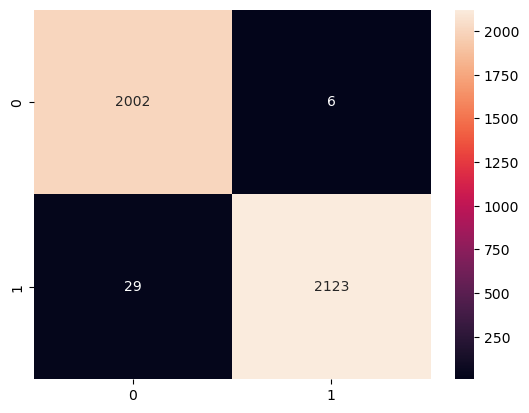

In [17]:
y_pred=model_rf.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2036
           1       0.99      0.99      0.99      2124

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



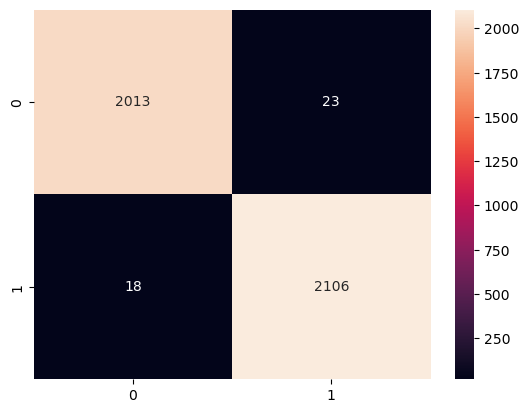

In [18]:
y_pred=model_dt.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1967
           1       0.99      0.96      0.98      2193

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



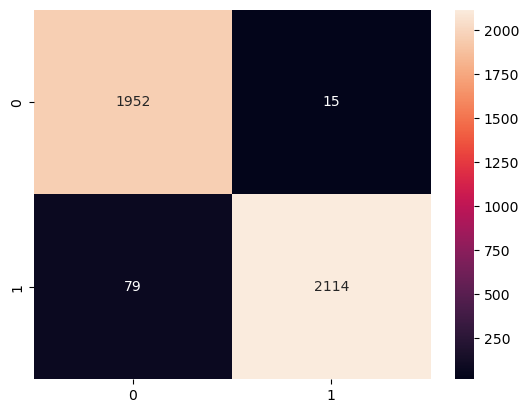

In [19]:
y_pred=model_lin.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2254
           1       0.89      0.99      0.94      1906

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.95      0.94      0.94      4160



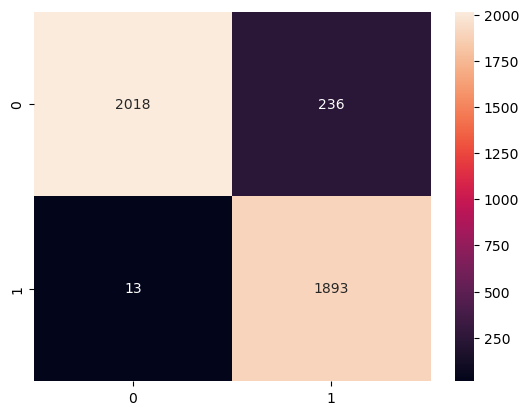

In [20]:
y_pred=model_nb.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1995
           1       1.00      0.98      0.99      2165

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



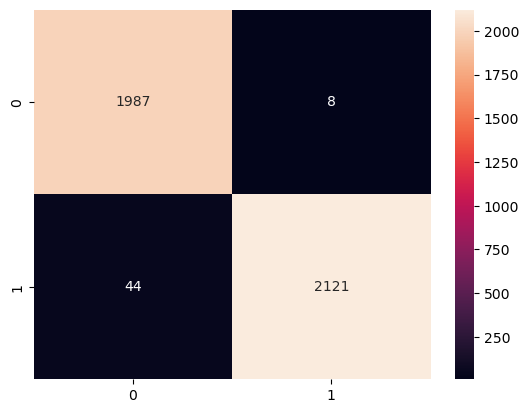

In [21]:
y_pred=model_xg.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')
print(classification_report(y_pred,y_test))

In [22]:
print('model_rf: ', model_rf.score(X_test,y_test))
print('model_dt: ', model_dt.score(X_test,y_test))
print('model_lin: ', model_lin.score(X_test,y_test))
print('model_nb: ', model_nb.score(X_test,y_test))
print('model_xg: ', model_xg.score(X_test,y_test))

model_rf:  0.9915865384615384
model_dt:  0.9901442307692307
model_lin:  0.9774038461538461
model_nb:  0.9401442307692308
model_xg:  0.9875


We have successfully predicted fake news using logistic regression, Multinomial Naive Bayes, Decision Tree, and XGBoost algothims